In [30]:
import h3
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import date, datetime
from rocrate.rocrate import ROCrate
from rocrate.model import (
    Person,
    File,
    Dataset,
    ComputationalWorkflow,
    ContextEntity,
)

In [6]:
def get_file_size(path):
    file_stats = os.stat(path)
    size = file_stats.st_size
    if size >= 1024*1024:
        return f"{round(file_stats.st_size / (1024*1024), 2)}MB"
    elif size >= 1024:
        return f"{round(file_stats.st_size / 1024, 2)}KB"
    else:         
        return f"{file_stats.st_size}B"

## Read in data

In [7]:
in_crate_obs = ROCrate("../../metastore/USGSGroundwaterConformed/")

In [8]:
file_uris= [file["@id"] for file in in_crate_obs.mainEntity.properties().get("hasParts", [])]
file_uris

['file:///data/common/USGSGroundwaterConformed/USGSGroundwaterConformed.parquet']

In [9]:
input_data_paths = [uri.replace("file://", "../..") for uri in file_uris]
input_data_paths

['../../data/common/USGSGroundwaterConformed/USGSGroundwaterConformed.parquet']

In [10]:
dfs = []
for input_path in input_data_paths:
    df = pd.read_parquet(input_path)
    dfs.append(df)
obs_df = pd.concat(dfs).reset_index(drop=True)
print(obs_df.shape)
obs_df.head()

(2886, 56)


,agency_cd,site_no,site_tp_cd,lev_dt,lev_tm,lev_tz_cd,sl_lev_va,sl_datum_cd,lev_status_cd,lev_agency_cd,...,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no,geometry,Cell15
0,USGS,400132075031001,GW,2014-08-14,14:55,UTC,27.74,NAVD88,1,USGS,...,YY Y Y,N400PDMBRX,300WSCK,U,29,29,O,247600265,"{'coordinates': [-75.05277778, 40.02555556], '...",8f2a1341eb2876a
1,USGS,400132075031001,GW,2014-09-15,16:36,UTC,27.69,NAVD88,1,USGS,...,YY Y Y,N400PDMBRX,300WSCK,U,29,29,O,247600265,"{'coordinates': [-75.05277778, 40.02555556], '...",8f2a1341eb2876a
2,USGS,400132075031001,GW,2014-11-13,15:15,UTC,27.00,NAVD88,1,USGS,...,YY Y Y,N400PDMBRX,300WSCK,U,29,29,O,247600265,"{'coordinates': [-75.05277778, 40.02555556], '...",8f2a1341eb2876a
3,USGS,400132075031001,GW,2014-12-16,16:15,UTC,27.00,NAVD88,1,USGS,...,YY Y Y,N400PDMBRX,300WSCK,U,29,29,O,247600265,"{'coordinates': [-75.05277778, 40.02555556], '...",8f2a1341eb2876a
4,USGS,400132075031001,GW,2015-01-14,15:53,UTC,27.13,NAVD88,1,USGS,...,YY Y Y,N400PDMBRX,300WSCK,U,29,29,O,247600265,"{'coordinates': [-75.05277778, 40.02555556], '...",8f2a1341eb2876a


In [11]:
obs_df.columns

Index(['agency_cd', 'site_no', 'site_tp_cd', 'lev_dt', 'lev_tm', 'lev_tz_cd',
       'sl_lev_va', 'sl_datum_cd', 'lev_status_cd', 'lev_agency_cd',
       'lev_dt_acy_cd', 'lev_acy_cd', 'lev_src_cd', 'lev_meth_cd',
       'lev_age_cd', 'station_nm', 'lat_va', 'long_va', 'dec_lat_va',
       'dec_long_va', 'coord_meth_cd', 'coord_acy_cd', 'coord_datum_cd',
       'dec_coord_datum_cd', 'district_cd', 'state_cd', 'county_cd',
       'country_cd', 'land_net_ds', 'map_nm', 'map_scale_fc', 'alt_va',
       'alt_meth_cd', 'alt_acy_va', 'alt_datum_cd', 'huc_cd', 'basin_cd',
       'topo_cd', 'instruments_cd', 'construction_dt', 'inventory_dt',
       'drain_area_va', 'contrib_drain_area_va', 'tz_cd', 'local_time_fg',
       'reliability_cd', 'gw_file_cd', 'nat_aqfr_cd', 'aqfr_cd',
       'aqfr_type_cd', 'well_depth_va', 'hole_depth_va', 'depth_src_cd',
       'project_no', 'geometry', 'Cell15'],
      dtype='object')

In [12]:
obs_df["aqfr_type_cd"].value_counts()

aqfr_type_cd
U    1589
X     450
N     152
Name: count, dtype: int64

In [13]:
obs_df["nat_aqfr_cd"].value_counts()

nat_aqfr_cd
N400PDMBRX    1567
S100NATLCP    1012
N100GLCIAL     307
Name: count, dtype: int64

In [14]:
obs_df["aqfr_cd"].value_counts()

aqfr_cd
112TREN     828
300WSCKO    707
300WSCK     566
000GRDR     294
112PNSK     200
211MRPAL    154
211MRPAM    137
Name: count, dtype: int64

In [35]:
obs_df["obs_date"] = obs_df["lev_dt"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

<Axes: xlabel='obs_date', ylabel='sl_lev_va'>

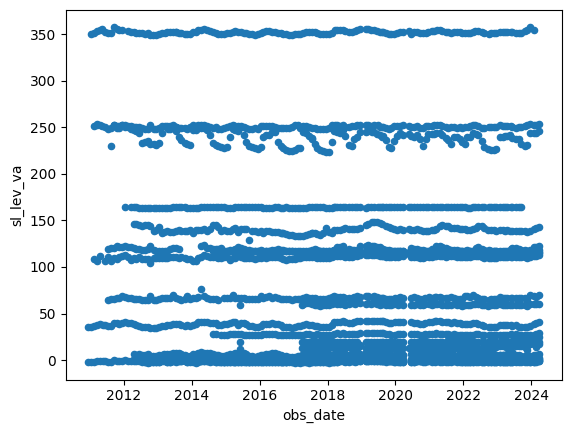

In [38]:
obs_df[(obs_df["obs_date"] >= datetime(2010, 1, 1))].astype({"sl_lev_va": float}).plot(
    kind="scatter",
    x="obs_date",
    y="sl_lev_va",
)

In [40]:
import seaborn as sns

<Axes: xlabel='obs_date', ylabel='sl_lev_va'>

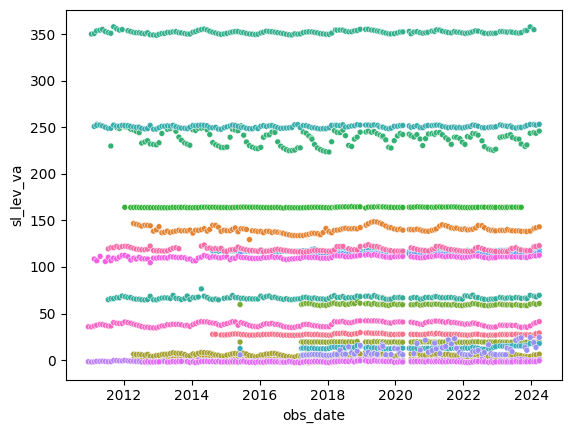

In [44]:
sns.scatterplot(
    obs_df[(obs_df["obs_date"] >= datetime(2010, 1, 1))].astype({"sl_lev_va": float}),
    x="obs_date",
    y="sl_lev_va",
    hue="site_no",
    size=3,
    legend=False,
)

<Axes: xlabel='obs_date', ylabel='sl_lev_va'>

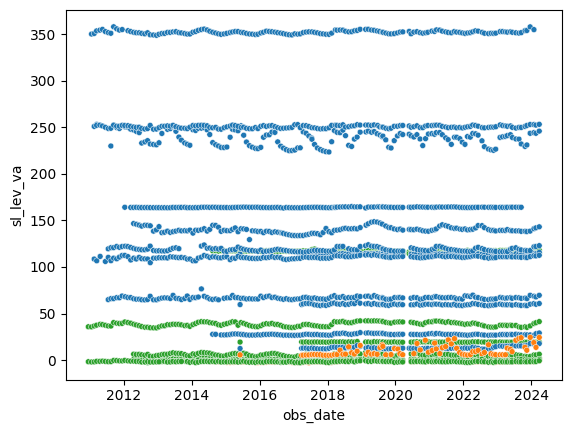

In [45]:
sns.scatterplot(
    obs_df[(obs_df["obs_date"] >= datetime(2010, 1, 1))].astype({"sl_lev_va": float}),
    x="obs_date",
    y="sl_lev_va",
    hue="nat_aqfr_cd",
    size=3,
    legend=False,
)

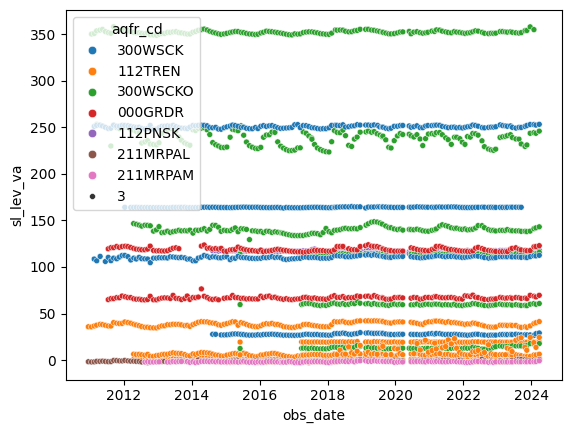

In [52]:
ax = sns.scatterplot(
    obs_df[(obs_df["obs_date"] >= datetime(2010, 1, 1))].astype({"sl_lev_va": float}),
    x="obs_date",
    y="sl_lev_va",
    hue="aqfr_cd",
    size=3,
    legend=True,
)

plt.show()

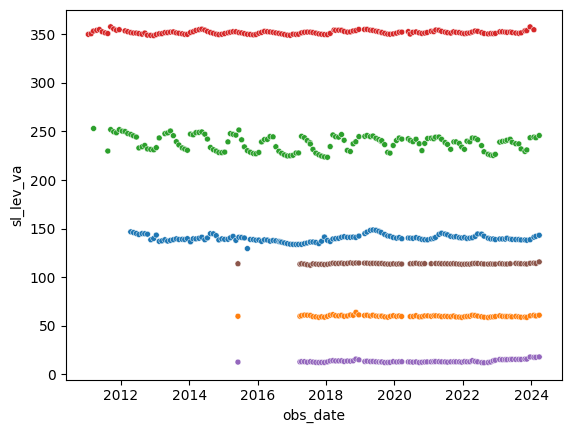

In [53]:
ax = sns.scatterplot(
    obs_df[
        (obs_df["obs_date"] >= datetime(2010, 1, 1))
        & (obs_df["aqfr_cd"] == "300WSCKO")
    ].astype({"sl_lev_va": float}),
    x="obs_date",
    y="sl_lev_va",
    hue="site_no",
    size=3,
    legend=False,
)

plt.show()

In [59]:
obs_df[
    (obs_df["obs_date"] >= datetime(2010, 1, 1))
    & (obs_df["aqfr_cd"] == "300WSCKO")
][[
    'agency_cd', 'site_no', 'station_nm', 
    'district_cd', 'state_cd', 'county_cd', 'country_cd', 
    'nat_aqfr_cd', 'aqfr_cd',
]].value_counts()

agency_cd  site_no          station_nm  district_cd  state_cd  county_cd  country_cd  nat_aqfr_cd  aqfr_cd 
USGS       400424075104901  PH   550    42           42        101        US          N400PDMBRX   300WSCKO    156
           400327075152201  PH  1044    42           42        101        US          N400PDMBRX   300WSCKO    152
           400217075142101  PH   540    42           42        101        US          N400PDMBRX   300WSCKO    144
           400055075122501  PH  1060    42           42        101        US          N400PDMBRX   300WSCKO     85
           395705075135901  PH  1061    42           42        101        US          N400PDMBRX   300WSCKO     84
           395849075134201  PH  1063    42           42        101        US          N400PDMBRX   300WSCKO     80
Name: count, dtype: int64